In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
MD_agric_df = pd.read_csv('MD_agric_exam-4313.csv')

MD_agric_df.head()

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava


# Write code to determine the number of unique crop types in the dataset?

In [3]:
unique_crop = MD_agric_df['Crop_type'].unique()
len_unique_crop = len(unique_crop)
print(f"The number of unique crop types in the dataset is: {len_unique_crop}")

The number of unique crop types in the dataset is: 8


# Identify the maximum annual yield for "wheat" crop type in the dataset (rounded to 2 decimal places).

In [4]:
wheat_df = MD_agric_df[MD_agric_df['Crop_type'] == 'wheat']
wheat_max = wheat_df['Annual_yield'].max()
print(f"The maximum annual yield for wheat crop type is: {round(wheat_max, 2)}")

The maximum annual yield for wheat crop type is: 8.99


# Find the total rainfall for crop types where the average pollution level is above 0.2.

In [5]:
filtered_df = MD_agric_df.groupby('Crop_type').filter(lambda x: x['Pollution_level'].mean() > 0.2)

# Calculate the total rainfall for the filtered crop types
total_rainfall = filtered_df['Rainfall'].sum()
print(f"Total rainfall for crop types where the average pollution level is above 0.2: {total_rainfall}")

Total rainfall for crop types where the average pollution level is above 0.2: 941959.7


# Write a function to calculate the temperature range (Max_temperature_C - Min_temperature_C) for each farmer's field. Then, call the function with the following `Field_ID`: `1458`, `1895`, and `5443`. What are the results of these 3 calls?

In [6]:
def calculate_temperature_range(df, field_id):
    field_data = df[df['Field_ID'] == field_id]
    
    if field_data.empty:
        return f'No data found for Field_ID: {field_id}'
    
    max_temp = field_data['Max_temperature_C']
    min_temp = field_data['Min_temperature_C']
    
    temperature_range = max_temp - min_temp
    return temperature_range

In [7]:
print(calculate_temperature_range(MD_agric_df, 1458))
print(calculate_temperature_range(MD_agric_df, 1895))
print(calculate_temperature_range(MD_agric_df, 5443))

135    40.7
dtype: float64
644    35.7
dtype: float64
892    33.4
dtype: float64


# Write code that identifies the crop type with the lowest average minimum temperature.

In [8]:
a = MD_agric_df['Crop_type'].unique()

b = float('inf')

c = ''

for crop in a:

    d = MD_agric_df[MD_agric_df['Crop_type'] == crop]['Min_temperature_C'].mean()

    if d < b:

        b = d

        c = crop

print(f"The crop with the lowest average minimum temprerature is: {c}")

The crop with the lowest average minimum temprerature is: rice


# Write code to calculate the total plot size for plots where the pH is less than 5.5.

In [9]:
#pH	Pollution_level	Plot_size
total_plot_size_low_ph = MD_agric_df[MD_agric_df['pH'] < 5.5]['Plot_size'].sum()
print(f"Total plot size for plots where the pH is less than 5.5 : {total_plot_size_low_ph}")

Total plot size for plots where the pH is less than 5.5 : 1731.8999999999999


# Using Pandas, create a dataframe that includes entries with a 'Min_temperature_C’< -5 and a 'Max_temperature_C' > 30. How many rows are in the filtered dataset?

In [10]:
filtered_MD_agric = MD_agric_df[(MD_agric_df['Min_temperature_C'] < -5) & (MD_agric_df['Max_temperature_C'] > 30)]
filtered_MD_agric.shape[0]

319

# Using Numpy, calculate the standard deviation of the 'Rainfall' for plots where the 'Plot_size' is larger than the median plot size of the dataset (round to 2 decimal places).



In [11]:
median_plot_size = MD_agric_df['Plot_size'].median()
print(f"The median plot size is {median_plot_size}\n")

# Select rows where Plot_size is larger than the median plot size
filtered_df = MD_agric_df[MD_agric_df['Plot_size'] > median_plot_size]

# Calculate the standard deviation of Rainfall for the selected plots
rainfall_std_dev = np.std(filtered_df['Rainfall'])

# Round the result to 2 decimal places
rainfall_std_dev_rounded = round(rainfall_std_dev, 2)

print(f'The standard deviation of Rainfall for plots with Plot_size larger than the median is: {rainfall_std_dev_rounded}')

The median plot size is 2.9

The standard deviation of Rainfall for plots with Plot_size larger than the median is: 469.62


# If you concatenate the first three digits of the most common ‘Max_temperature_C’ with the last three letters of the least common 'Crop_type', what string do you get?
Note: Use the first mode if there are multiple modes

In [12]:
max_temp_mode = MD_agric_df['Max_temperature_C'].mode().iloc[0]
print(max_temp_mode)
# Take the first three digits of the most common 'Max_temperature_C'
first_three_digits = str(int(max_temp_mode))[:3]
print(first_three_digits)
# Find the least common 'Crop_type'
least_common_crop = MD_agric_df['Crop_type'].value_counts().idxmin()
print(least_common_crop)
last_three_letters = least_common_crop[-3:]
print(last_three_letters)
result_string = first_three_digits + last_three_letters

print(f'The result string is: {result_string}')

30.7
30
rice
ice
The result string is: 30ice


# Write Python code to create a violin plot visualising the distribution of 'Annual_yield' across different 'Elevation' ranges. Use the provided elevation range categories (Low: < 300m, Medium: 300m - 600m, High: > 600m) to categorise the data before plotting.  Examine the violin plot displaying the distribution of 'Annual Yield' across three elevation categories (Low, Medium, High). What insight does the violin plot provide regarding the relationship between elevation ranges and annual yield distribution?

In [13]:
#function to categorise elevation ranges
def elevation_range(x):
    if x > 600:
        return 'High'
    elif (x >= 300) and (x <= 600):
        return 'Medium'
    else:
        return 'Low'

In [14]:
MD_agric_df['Elevation_range'] = MD_agric_df['Elevation'].apply(elevation_range)
MD_agric_df.head()

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type,Elevation_range
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee,Medium
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato,High
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana,Medium
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat,Medium
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava,High


<Axes: xlabel='Annual_yield', ylabel='Elevation_range'>

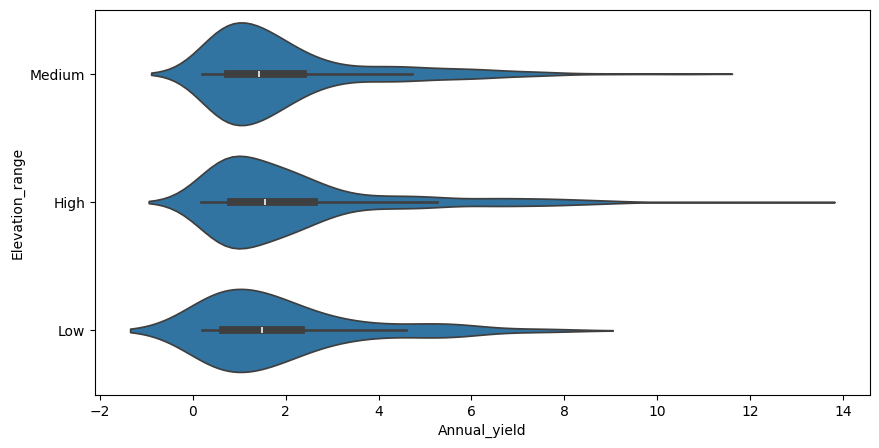

In [15]:
plt.figure( figsize =(10 ,5))

#Plot a Violin plot
sns.violinplot(data = MD_agric_df, x = 'Annual_yield', y= "Elevation_range")

### The 'Low' elevation category shows a more consistent yield distribution with less variability compared to the 'Medium' and 'High' categories. This could indicate that lower elevations provide stable conditions for consistent agricultural output.

# Assuming each 'Crop_type' contributes an integer value equal to its length (e.g., 'wheat' contributes 5), write a recursive function to sum the integer values for each unique crop type in the dataset. What is the sum?

In [16]:
# Get unique crop types from the 'Crop_type' column
unique_crop_types = MD_agric_df['Crop_type'].unique()
print(unique_crop_types)

['coffee' 'potato' 'banana' 'wheat' 'cassava' 'maize' 'tea' 'rice']


In [17]:
def recursive_crop_sum(df, index=0, crop_type_sum=0, unique_crop_types=None):
    # Base case: if we reach the end of the unique crop types
    if index == len(unique_crop_types):
        return crop_type_sum
    
    # Get the current crop type
    current_crop_type = unique_crop_types[index]
    
    # Sum the integer value based on the length of the crop type
    crop_type_length = len(current_crop_type)
    crop_type_sum += crop_type_length
    
    # Recursively call the function for the next crop type
    return recursive_crop_sum(df, index + 1, crop_type_sum, unique_crop_types)

In [18]:
total_crop_type_sum = recursive_crop_sum(MD_agric_df, unique_crop_types=unique_crop_types)

print(f'The sum of integer values for each unique crop type is: {total_crop_type_sum}')

The sum of integer values for each unique crop type is: 42


# Write Python code to perform a t-test comparing the average 'Annual_yield' between 'coffee' and 'banana' crop types using scipy.stats. What is the p-value, rounded to three decimal places?

In [19]:
annual_yield_coffee = MD_agric_df[MD_agric_df['Crop_type'] == 'coffee']['Annual_yield']
annual_yield_banana = MD_agric_df[MD_agric_df['Crop_type'] == 'banana']['Annual_yield']

# Perform t-test
t_statistic, p_value = ttest_ind(annual_yield_coffee, annual_yield_banana, equal_var=False)

# Round the p-value to three decimal places
rounded_p_value = round(p_value, 3)

print(f'The p-value for the t-test is: {rounded_p_value}')

The p-value for the t-test is: 0.598


### Null Hypothesis (H₀): The null hypothesis typically assumes that there is no significant difference between the average 'Annual_yield' for 'coffee' and 'banana' crop types.

### Alternative Hypothesis (H₁): The alternative hypothesis suggests that there is a significant difference between the average 'Annual_yield' for 'coffee' and 'banana' crop types.

### A p-value of 0.598 is greater than the commonly used significance level of 0.05.
### When the p-value is high, it suggests that the observed differences in average yields between 'coffee' and 'banana' could likely have occurred by random chance.
### Therefore, there is not enough evidence to reject the null hypothesis.